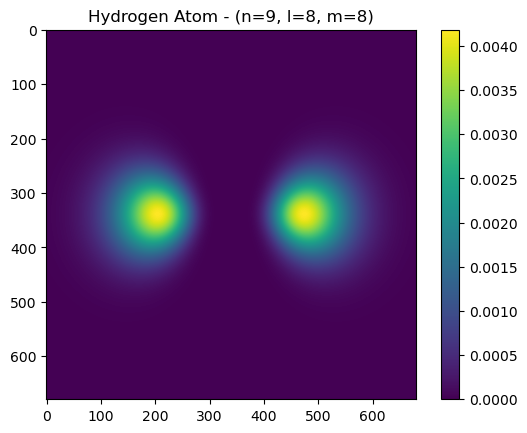

In [177]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.constants import physical_constants

# radial function Rnl(r)
def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)
    constant_factor = np.sqrt(((2 / n * a0) ** 3 * (sp.factorial(n - l - 1))) /
                              (2 * n * (sp.factorial(n + l))))
    return constant_factor * np.exp(-p / 2) * (p ** l) * laguerre(p)

# angular function Ylm(θ,φ)
def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))
    constant_factor = ((-1) ** m) * np.sqrt(((2 * l + 1) * sp.factorial(l - np.abs(m))) /
                                            (4 * np.pi * sp.factorial(l + np.abs(m))))
    return constant_factor * legendre * np.real(np.exp(1.j * m * phi))

# wavefunction Ψnlm(r,θ,φ)
def compute_wavefunction(n, l, m, a0_scale_factor):
    a0 = a0_scale_factor * physical_constants['Bohr radius'][0] * 1e+12
    grid_extent = 480
    grid_resolution = 680
    z = x = np.linspace(-grid_extent, grid_extent, grid_resolution)
    z, x = np.meshgrid(z, x)
    eps = np.finfo(float).eps
    r = np.sqrt(x ** 2 + z ** 2)
    theta = np.arctan(x / (z + eps))
    psi = radial_function(n, l, r, a0) * angular_function(m, l, theta, 0)
    return psi

# probability density |Ψ|^2
def compute_probability_density(psi):
    return np.abs(psi) ** 2

# plotting function
def plot_wf_probability_density(n, l, m, a0_scale_factor, colormap='viridis'):
    psi = compute_wavefunction(n, l, m, a0_scale_factor)
    prob_density = compute_probability_density(psi)
    
    # display the plot with the title, axes, and colorbar
    plt.imshow(np.sqrt(prob_density).T, cmap=colormap)
    plt.colorbar()
    plt.title(f'Hydrogen Atom - (n={n}, l={l}, m={m})')
    plt.show()

    # save the plot without information for model training
    fig, ax = plt.subplots()
    ax.imshow(np.sqrt(prob_density).T, cmap=colormap)
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(f'{n}_{l}_{m}.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)


# set quantum numbers as desired
plot_wf_probability_density(9, 8, 8, 0.05)